In [ ]:
!pip install squarify
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 49.3 MB/s eta 0:00:00


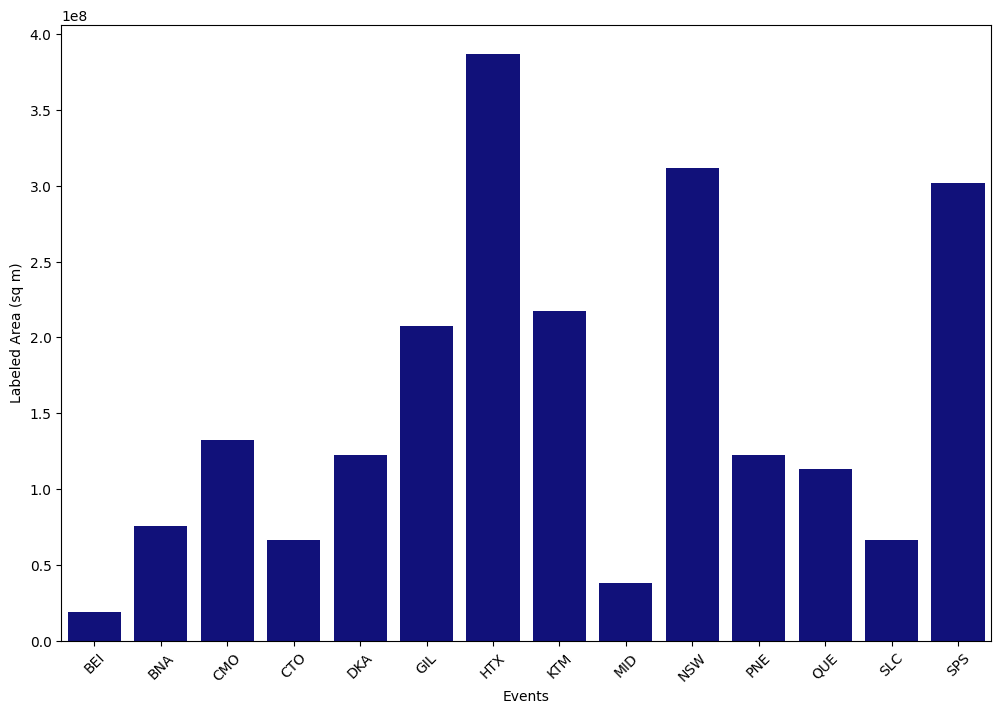

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Your data
data = pd.DataFrame({
    'Events': ['BEI', 'BNA', 'CMO', 'CTO', 'DKA', 'GIL', 'HTX', 'KTM', 'MID', 'NSW', 'PNE', 'QUE', 'SLC', 'SPS'],
    'Count': [2, 8, 14, 7, 13, 22, 41, 23, 4, 33, 13, 12, 7, 32]
})

# Calculate the total area represented by each event
image_area = 1024 * 1024 * 9  # in square meters
data['Labeled Area (sq m)'] = data['Count'] * image_area

# Normalize the areas to fit the treemap dimensions
normed_areas = data['Labeled Area (sq m)'] / min(data['Labeled Area (sq m)'])

# Create a monochrome color list, varying the brightness based on the area
colors = [plt.cm.Blues(i/float(len(data))) for i in range(len(data))]

# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Events', y='Labeled Area (sq m)', data=data, color='darkblue')
# plt.title('Labeled Area Comparison per Event')
plt.xticks(rotation=45)
plt.xlabel('Events')
plt.ylabel('Labeled Area (sq m)')
plt.show()


# # Plot
# plt.figure(figsize=(9, 9))
# squarify.plot(sizes=normed_areas, label=data['Events'], color=colors, alpha=0.6)
# plt.axis('off')
# plt.title('Labeled Area Comparison per Event')
# plt.show()

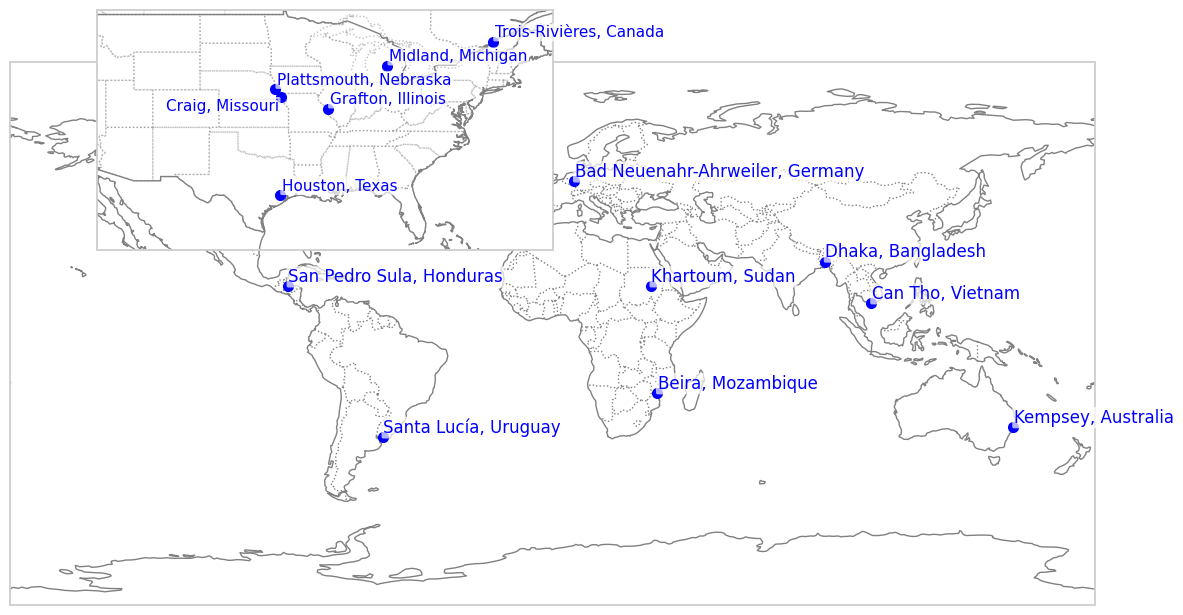

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_flood_events_centroids_with_labels_and_inset(geojson_path):
    try:
        # Load GeoJSON data
        gdf = gpd.read_file(geojson_path)

        # Setup the main plot with PlateCarree projection
        fig = plt.figure(figsize=(14, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE, edgecolor='gray')
        ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
        ax.set_global()  # Set a global extent

        # Define the extent for the USA (adjust as needed)
        usa_extent = [-115, -66.5, 24, 49.5]  # [min longitude, max longitude, min latitude, max latitude]

        # Plot centroids with labels on the main map
        for index, row in gdf.iterrows():
            marker_color = '#0000ff'  # Marker color
            font_color = '#0000ff'    # Font color
            ax.plot(row.geometry.x, row.geometry.y, marker='o', color=marker_color, markersize=7,
                    transform=ccrs.Geodetic())

            # Default label offsets and alignment
            label_x_offset = 0.2
            label_y_offset = 0.2
            ha = 'left'
            va = 'bottom'

            # Adjust label position for events containing 'Craig'
            if 'Craig' in row['EventNameShort']:
                label_x_offset = -0.2
                label_y_offset = -0.2
                ha = 'right'
                va = 'top'

            ax.text(row.geometry.x + label_x_offset, row.geometry.y + label_y_offset, row['EventNameShort'],
                    transform=ccrs.Geodetic(), fontsize=12, ha=ha, va=va, color=font_color,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.1'))

        # Create an inset map focused on the USA
        inset_location = [0.05, 0.6, 0.6, 0.3]  # [left, bottom, width, height]
        ax_inset = fig.add_axes(inset_location, projection=ccrs.PlateCarree())
        ax_inset.set_extent(usa_extent, crs=ccrs.PlateCarree())
        ax_inset.add_feature(cfeature.COASTLINE, edgecolor='gray')
        ax_inset.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='gray')
        ax_inset.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray', alpha=0.5)

        # Plot centroids and labels on the inset map for events within the USA extent
        for index, row in gdf.iterrows():
            if usa_extent[0] <= row.geometry.x <= usa_extent[1] and usa_extent[2] <= row.geometry.y <= usa_extent[3]:
                marker_color = '#0000ff'
                font_color = '#0000ff'
                ax_inset.plot(row.geometry.x, row.geometry.y, marker='o', color=marker_color, markersize=7,
                              transform=ccrs.Geodetic())

                # Default offsets and alignment for inset labels
                label_x_offset = 0.2
                label_y_offset = 0.2
                ha = 'left'
                va = 'bottom'

                if 'Craig' in row['EventNameShort']:
                    label_x_offset = -0.2
                    label_y_offset = -0.2
                    ha = 'right'
                    va = 'top'

                ax_inset.text(row.geometry.x + label_x_offset, row.geometry.y + label_y_offset, row['EventNameShort'],
                              transform=ccrs.Geodetic(), fontsize=11, ha=ha, va=va, color=font_color,
                              bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.1'))

        # Save the figure as a PDF with dpi=400
        output_filename = "/content/drive/MyDrive/UA_Transition/UFO/fig1.pdf"
        plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"An error occurred: {e}")

# Path to your GeoJSON file
geojson_path = r'/content/drive/MyDrive/UA_Transition/UFO/UFOEventsCentroids.geojson'
plot_flood_events_centroids_with_labels_and_inset(geojson_path)


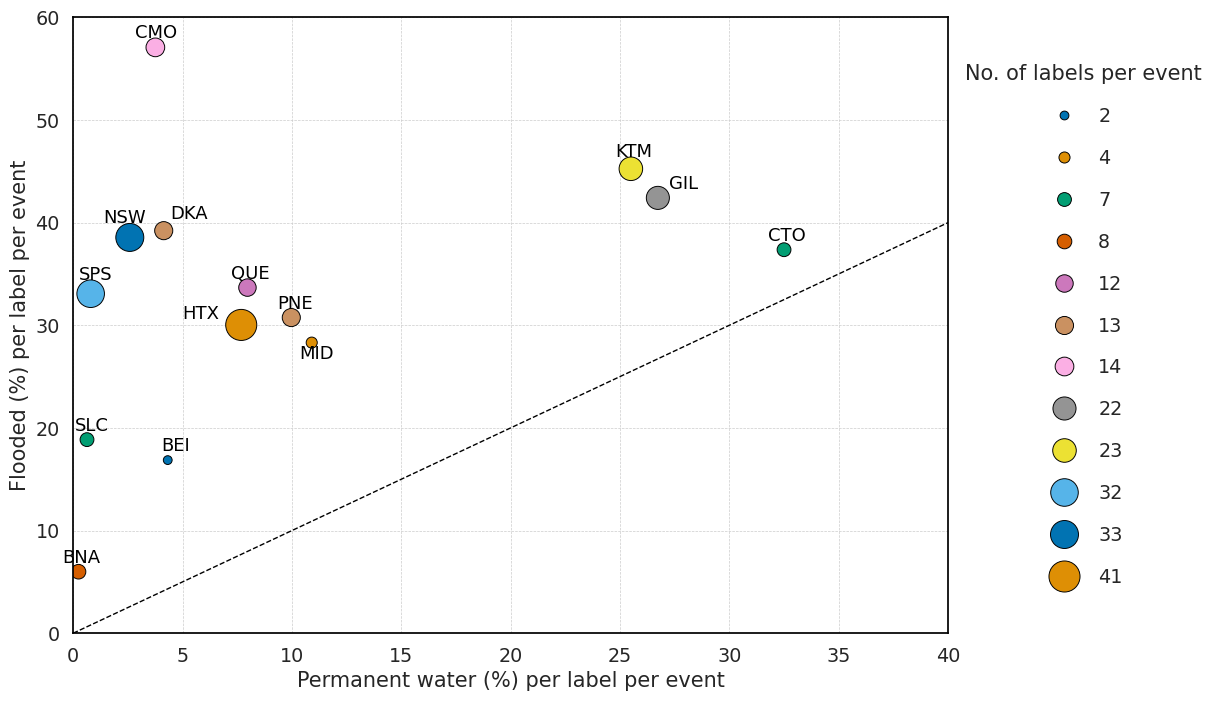

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def main():
    try:
        # Define the data
        data = {
            'Events': ['BEI', 'BNA', 'CMO', 'CTO', 'DKA', 'GIL', 'HTX', 'KTM', 'MID', 'NSW',
                       'PNE', 'QUE', 'SLC', 'SPS'],
            'Flooded (%)': [16.865, 5.99375, 57.06642857, 37.35714286, 39.21307692, 42.40681818,
                            30.03146341, 45.24043478, 28.3075, 38.5530303, 30.74923077,
                            33.66833333, 18.85857143, 33.0709375],
            'Permanent Water (%)': [4.325, 0.24625, 3.759285714, 32.49857143, 4.141538462,
                                    26.73090909, 7.684878049, 25.49695652, 10.9075, 2.590909091,
                                    9.973076923, 7.969166667, 0.634285714, 0.801875],
            'Count': [2, 8, 14, 7, 13, 22, 41, 23, 4, 33, 13, 12, 7, 32]
        }
        df = pd.DataFrame(data)

        # Set visualization context and style
        sns.set_context("notebook", font_scale=1.25)
        sns.set_style("whitegrid")

        # Create the figure
        plt.figure(figsize=(14, 8))

        # Create the bubble chart with a colorblind friendly palette
        bubble = sns.scatterplot(
            data=df,
            x='Permanent Water (%)',
            y='Flooded (%)',
            size='Count',
            sizes=(40, 500),
            hue='Count',
            palette='colorblind',  # Using a colorblind friendly palette
            edgecolor="black",
            legend="full"
        )

        # Set the x-axis limit to 40 and y-axis limit to 60
        plt.xlim(0, 40)
        plt.ylim(0, 60)

        # Add the 45-degree reference line (diagonal)
        plt.plot([0, 40], [0, 40], color='black', linestyle='--', linewidth=1)

        # Update grid lines to dashed style
        ax = plt.gca()
        ax.grid(True, linestyle='--', linewidth=0.5)

        # Make plot border black by iterating over all spines
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Annotate each point with its corresponding event label
        for index, row in df.iterrows():
            label_offset_x = 1
            label_offset_y = 0.5
            ha = "right"  # horizontal alignment
            va = "bottom"  # vertical alignment

            # Adjustments for specific events
            if row['Events'] == 'HTX':
                label_offset_x = -1  # Shift label to the left
                label_offset_y = 0.25  # Slight vertical adjustment
            elif row['Events'] == 'MID':
                label_offset_y = -2  # Move the label upward
            elif row['Events'] == 'GIL':
                label_offset_x = 0.5  # Minor horizontal adjustment
                label_offset_y = 0.5
                ha = "left"
            elif row['Events'] == 'KTM':
                label_offset_y = 0.75  # Vertical adjustment
            elif row['Events'] == 'DKA':
                label_offset_x = 2  # Horizontal adjustment
                label_offset_y = 0.75
            elif row['Events'] == 'SPS':
                label_offset_y = 1  # Vertical adjustment
            elif row['Events'] == 'NSW':
                label_offset_x = 0.75
                label_offset_y = 1

            plt.text(
                row['Permanent Water (%)'] + label_offset_x,
                row['Flooded (%)'] + label_offset_y,
                row['Events'],
                color='black',
                ha=ha,
                va=va,
                fontsize=13
            )

        # Create legend without a border by setting frameon to False
        plt.legend(
            title='No. of labels per event',
            labelspacing=1.2,
            loc='center left',
            bbox_to_anchor=(1, 0.5),
            frameon=False
        )
        plt.xlabel('Permanent water (%) per label per event')
        plt.ylabel('Flooded (%) per label per event')
        plt.subplots_adjust(right=0.75)


        output_filename = "/content/drive/MyDrive/UA_Transition/UFO/fig2.pdf"
        plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print("An error occurred:", e)

if __name__ == '__main__':
    main()


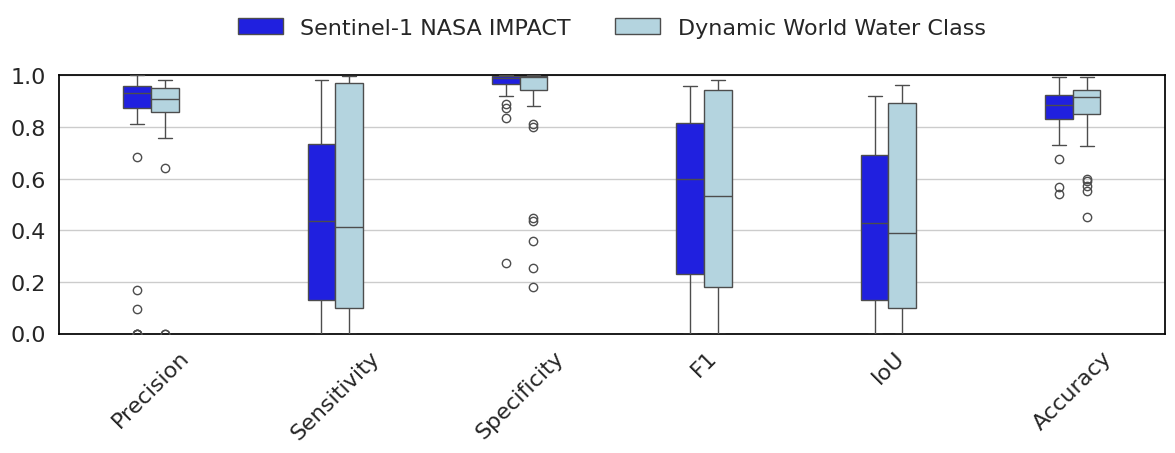

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# Define file paths
file_path1 = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsS1UFO.csv'
file_path2 = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsDWUFOv2.csv'

# Load the CSV files with error handling
try:
    data1 = pd.read_csv(file_path1)
except Exception as e:
    print(f"Error reading file {file_path1}: {e}")
    sys.exit(1)

try:
    data2 = pd.read_csv(file_path2)
except Exception as e:
    print(f"Error reading file {file_path2}: {e}")
    sys.exit(1)

# Add a column to identify the source for each dataset
data1['Source'] = 'Sentinel-1 NASA IMPACT'
data2['Source'] = 'Dynamic World Water Class'

# Concatenate the two datasets
data = pd.concat([data1, data2], ignore_index=True)

# Define the list of metrics
metrics = ['Precision', 'Sensitivity', 'Specificity', 'F1', 'IoU', 'Accuracy']

# Melt the data for a suitable format for seaborn boxplot
data_melted = data.melt(id_vars='Source', value_vars=metrics, var_name='Metric', value_name='Value')

# Define a custom palette: one pure blue and one lighter blue
custom_palette = {
    "Sentinel-1 NASA IMPACT": "#0000ff",
    "Dynamic World Water Class": "#ADD8E6"
}

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data_melted, x='Metric', y='Value', hue='Source', width=0.3, palette=custom_palette)

# Remove the axis titles (x and y labels)
ax.set_xlabel("")
ax.set_ylabel("")

# Set tick labels font size and rotation
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Set the y-axis limit to 1
plt.ylim(0, 1)

# Position the legend higher without a title and with no border; arranged side by side (2 columns)
leg = plt.legend(frameon=False, fontsize=16, loc='upper center',
                 bbox_to_anchor=(0.5, 1.3), ncol=2)

for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Bring the box plot elements (lines and patches) to the front
for line in ax.lines:
    line.set_zorder(3)
for patch in ax.artists:
    patch.set_zorder(3)

# Adjust layout to accommodate the high legend and ensure nothing is clipped
plt.tight_layout(rect=[0, 0, 1, 0.9])
output_filename = "/content/drive/MyDrive/UA_Transition/UFO/fig10.pdf"
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


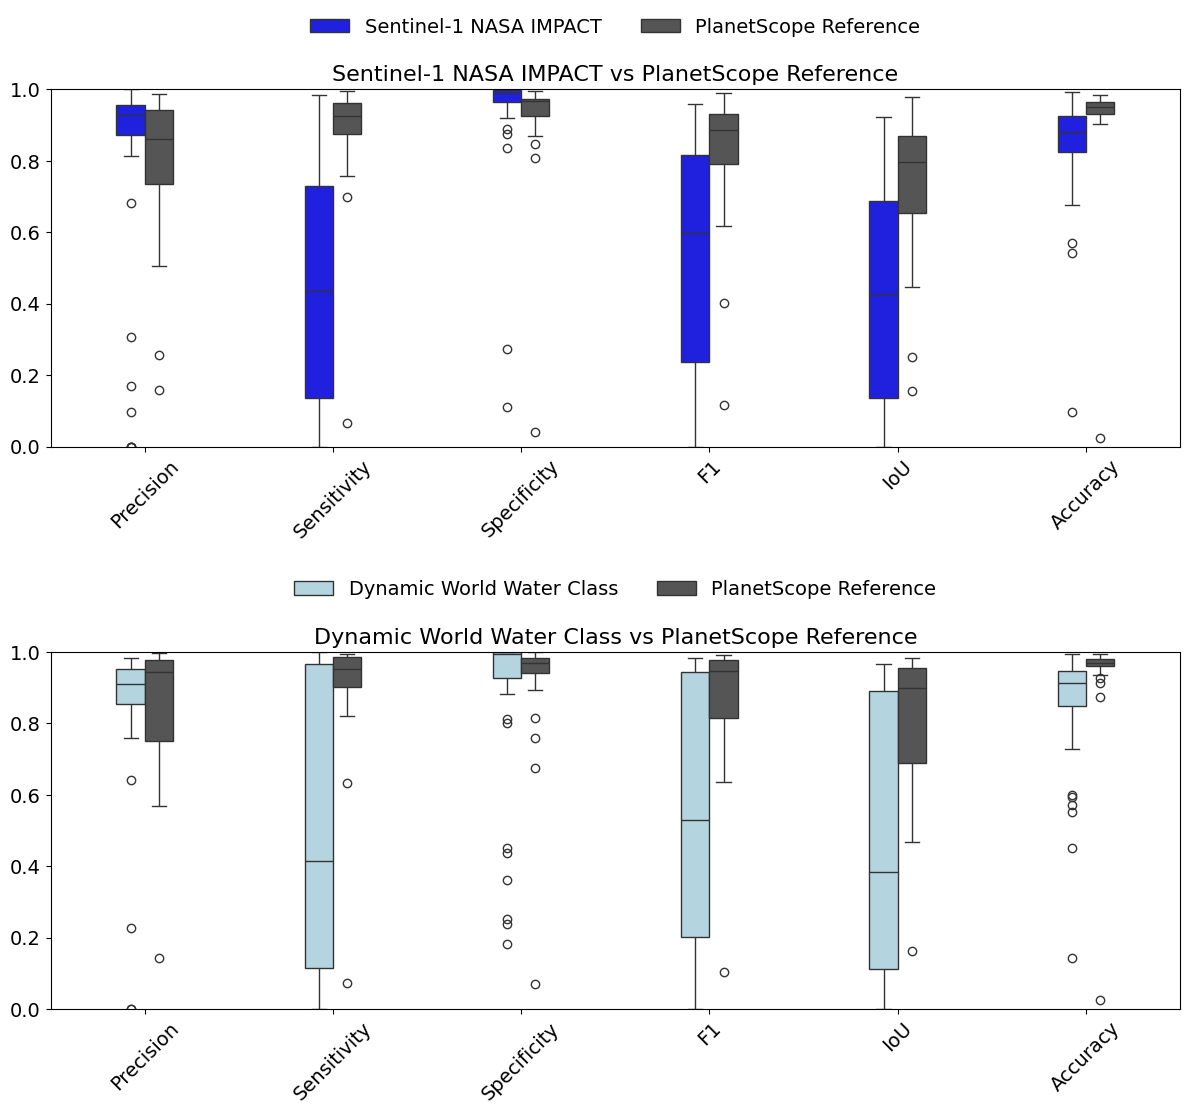

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# Define file paths
file_ps_s1 = '/content/drive/MyDrive/UA_Transition/UFO/predictionsPSS1.csv'  # File for PS vs S1
file_ps_dw = '/content/drive/MyDrive/UA_Transition/UFO/predictionsPSDW.csv'  # File for PS vs DW

# Load CSV files with error handling
try:
    df_ps_s1 = pd.read_csv(file_ps_s1)
except Exception as e:
    print(f"Error reading {file_ps_s1}: {e}")
    sys.exit(1)

try:
    df_ps_dw = pd.read_csv(file_ps_dw)
except Exception as e:
    print(f"Error reading {file_ps_dw}: {e}")
    sys.exit(1)

# List of metrics to be used
metrics = ['Precision', 'Sensitivity', 'Specificity', 'F1', 'IoU', 'Accuracy']

# Helper function to melt the dataframe based on a given metric suffix and source label
def melt_metrics(df, metric_suffix, source_label):
    melted_list = []
    for metric in metrics:
        col = f"{metric}_{metric_suffix}"
        if col in df.columns:
            temp = df[[col]].copy()
            temp.rename(columns={col: 'Value'}, inplace=True)
            temp['Metric'] = metric
            temp['Source'] = source_label
            melted_list.append(temp)
        else:
            print(f"Warning: Column {col} not found in the dataframe.")
    if not melted_list:
        print(f"Error: No columns found for suffix '{metric_suffix}' in the dataframe.")
        sys.exit(1)
    melted_df = pd.concat(melted_list, ignore_index=True)
    return melted_df

# Prepare data for PS vs S1 comparison
# S1 values come from columns with the '_s1' suffix and PS values from '_rexnet'
df_s1 = melt_metrics(df_ps_s1, 's1', 'Sentinel-1 NASA IMPACT')
df_ps_from_s1 = melt_metrics(df_ps_s1, 'rexnet', 'PlanetScope Reference')
df_plot_s1 = pd.concat([df_s1, df_ps_from_s1], ignore_index=True)

# Prepare data for PS vs DW comparison
# DW values come from columns with the '_DW' suffix and PS values from '_rexnet'
df_dw = melt_metrics(df_ps_dw, 'DW', 'Dynamic World Water Class')
df_ps_from_dw = melt_metrics(df_ps_dw, 'rexnet', 'PlanetScope Reference')
df_plot_dw = pd.concat([df_dw, df_ps_from_dw], ignore_index=True)

# Define a custom color palette
palette = {
    "Sentinel-1 NASA IMPACT": "#0000ff",
    "Dynamic World Water Class": "#ADD8E6",
    "PlanetScope Reference": "#555555"
}

# Create subplots: two vertically stacked boxplots sharing the same y-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharey=True)

# Boxplot for Sentinel-1 vs PlanetScope
sns.boxplot(data=df_plot_s1, x='Metric', y='Value', hue='Source', width=0.3,
            palette=palette, ax=axes[0])
axes[0].set_title('Sentinel-1 NASA IMPACT vs PlanetScope Reference', fontsize=16)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].tick_params(axis='x', rotation=45, labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylim(0, 1)
axes[0].legend(frameon=False, fontsize=14, loc='upper center',
               bbox_to_anchor=(0.5, 1.25), ncol=2)
for spine in axes[0].spines.values():
    spine.set_edgecolor('black')

# Boxplot for Dynamic World vs PlanetScope
sns.boxplot(data=df_plot_dw, x='Metric', y='Value', hue='Source', width=0.3,
            palette=palette, ax=axes[1])
axes[1].set_title('Dynamic World Water Class vs PlanetScope Reference', fontsize=16)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45, labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].set_ylim(0, 1)
axes[1].legend(frameon=False, fontsize=14, loc='upper center',
               bbox_to_anchor=(0.5, 1.25), ncol=2)
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')

# Adjust layout to accommodate legends and avoid clipping
plt.tight_layout(rect=[0, 0, 1, 0.95])
output_file = "/content/drive/MyDrive/UA_Transition/UFO/fig10_ps_vs_models.pdf"
plt.savefig(output_file, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


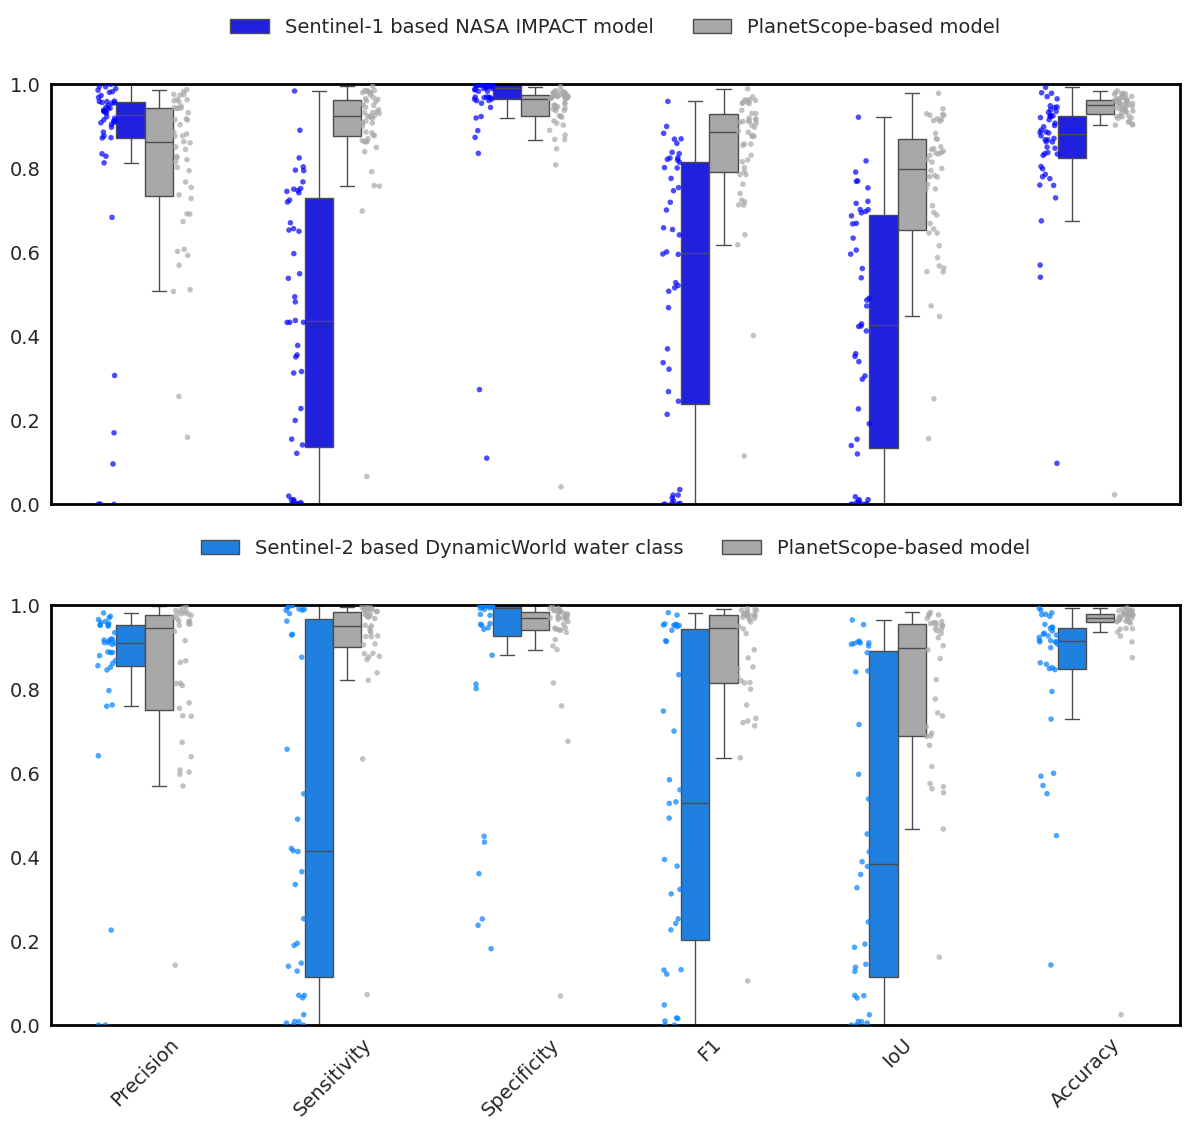

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# Define file paths
file_ps_s1 = '/content/drive/MyDrive/UA_Transition/UFO/predictionsPSS1.csv'  # File for PS vs S1
file_ps_dw = '/content/drive/MyDrive/UA_Transition/UFO/predictionsPSDW.csv'  # File for PS vs DW

# Load CSV files with error handling
try:
    df_ps_s1 = pd.read_csv(file_ps_s1)
except Exception as e:
    print(f"Error reading {file_ps_s1}: {e}")
    sys.exit(1)

try:
    df_ps_dw = pd.read_csv(file_ps_dw)
except Exception as e:
    print(f"Error reading {file_ps_dw}: {e}")
    sys.exit(1)

# List of metrics to be used
metrics = ['Precision', 'Sensitivity', 'Specificity', 'F1', 'IoU', 'Accuracy']

# Helper function to melt the dataframe based on a given metric suffix and source label
def melt_metrics(df, metric_suffix, source_label):
    melted_list = []
    for metric in metrics:
        col = f"{metric}_{metric_suffix}"
        if col in df.columns:
            temp = df[[col]].copy()
            temp.rename(columns={col: 'Value'}, inplace=True)
            temp['Metric'] = metric
            temp['Source'] = source_label
            melted_list.append(temp)
        else:
            print(f"Warning: Column {col} not found in the dataframe.")
    if not melted_list:
        print(f"Error: No columns found for suffix '{metric_suffix}' in the dataframe.")
        sys.exit(1)
    melted_df = pd.concat(melted_list, ignore_index=True)
    return melted_df

# Prepare data for PS vs Sentinel-1 comparison
df_s1 = melt_metrics(df_ps_s1, 's1', 'Sentinel-1 based NASA IMPACT model')
df_ps_from_s1 = melt_metrics(df_ps_s1, 'rexnet', 'PlanetScope-based model')
df_plot_s1 = pd.concat([df_s1, df_ps_from_s1], ignore_index=True)

# Prepare data for PS vs Dynamic World comparison
df_dw = melt_metrics(df_ps_dw, 'DW', 'Sentinel-2 based DynamicWorld water class')
df_ps_from_dw = melt_metrics(df_ps_dw, 'rexnet', 'PlanetScope-based model')
df_plot_dw = pd.concat([df_dw, df_ps_from_dw], ignore_index=True)

# Define a custom color palette
palette = {
    "Sentinel-1 based NASA IMPACT model": "#0000ff",
    "Sentinel-2 based DynamicWorld water class": "#0080ff",
    "PlanetScope-based model": "#a8a8a8"
}

# Create subplots: two vertically stacked boxplots sharing the same y-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharey=True)

# --- Plot for Sentinel-1 vs PlanetScope --- #
ax = axes[0]
sns.boxplot(
    data=df_plot_s1,
    x='Metric',
    y='Value',
    hue='Source',
    width=0.3,            # Control box width
    palette=palette,
    showfliers=False,     # Hide outlier circles
    linewidth=1,          # Thicker box outlines
    dodge=True,           # Side-by-side boxes for each category
    ax=ax
)
# Use the same palette for the dots so they match the box colors
sns.stripplot(
    data=df_plot_s1,
    x='Metric',
    y='Value',
    hue='Source',
    dodge=True,           # Align with the side-by-side boxes
    jitter=True,          # Small horizontal scatter to avoid overlap
    palette=palette,
    size=4,
    alpha=0.7,
    ax=ax
)

# Remove duplicate legend entries (boxplot + stripplot each add legend handles)
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))  # preserve order
unique_handles = []
seen = set()
for h, l in zip(handles, labels):
    if l not in seen:
        unique_handles.append(h)
        seen.add(l)
ax.legend(unique_handles, unique_labels, frameon=False, fontsize=14, loc='upper center',
          bbox_to_anchor=(0.5, 1.2), ncol=2)

# Remove subplot title and axis labels
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylim(0, 1)
ax.set_xticklabels([])  # Remove x-axis tick labels for the top plot

# Increase the axis border line width
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# --- Plot for Dynamic World vs PlanetScope --- #
ax = axes[1]
sns.boxplot(
    data=df_plot_dw,
    x='Metric',
    y='Value',
    hue='Source',
    width=0.3,
    palette=palette,
    showfliers=False,
    linewidth=1,
    dodge=True,
    ax=ax
)
sns.stripplot(
    data=df_plot_dw,
    x='Metric',
    y='Value',
    hue='Source',
    dodge=True,
    jitter=True,
    palette=palette,
    size=4,
    alpha=0.7,
    ax=ax
)

handles, labels = ax.get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = []
seen = set()
for h, l in zip(handles, labels):
    if l not in seen:
        unique_handles.append(h)
        seen.add(l)
ax.legend(unique_handles, unique_labels, frameon=False, fontsize=14, loc='upper center',
          bbox_to_anchor=(0.5, 1.2), ncol=2)

ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='x', rotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylim(0, 1)
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save and display the figure
output_file = "/content/drive/MyDrive/UA_Transition/UFO/fig10.pdf"
plt.savefig(output_file, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


CSV file saved to /content/drive/MyDrive/UA_Transition/UFO/normalized_iou_per_region.csv


<ipython-input-35-6515e5a99c3e>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Specificity', data=data, ax=ax, showfliers=False, palette=region_to_color)


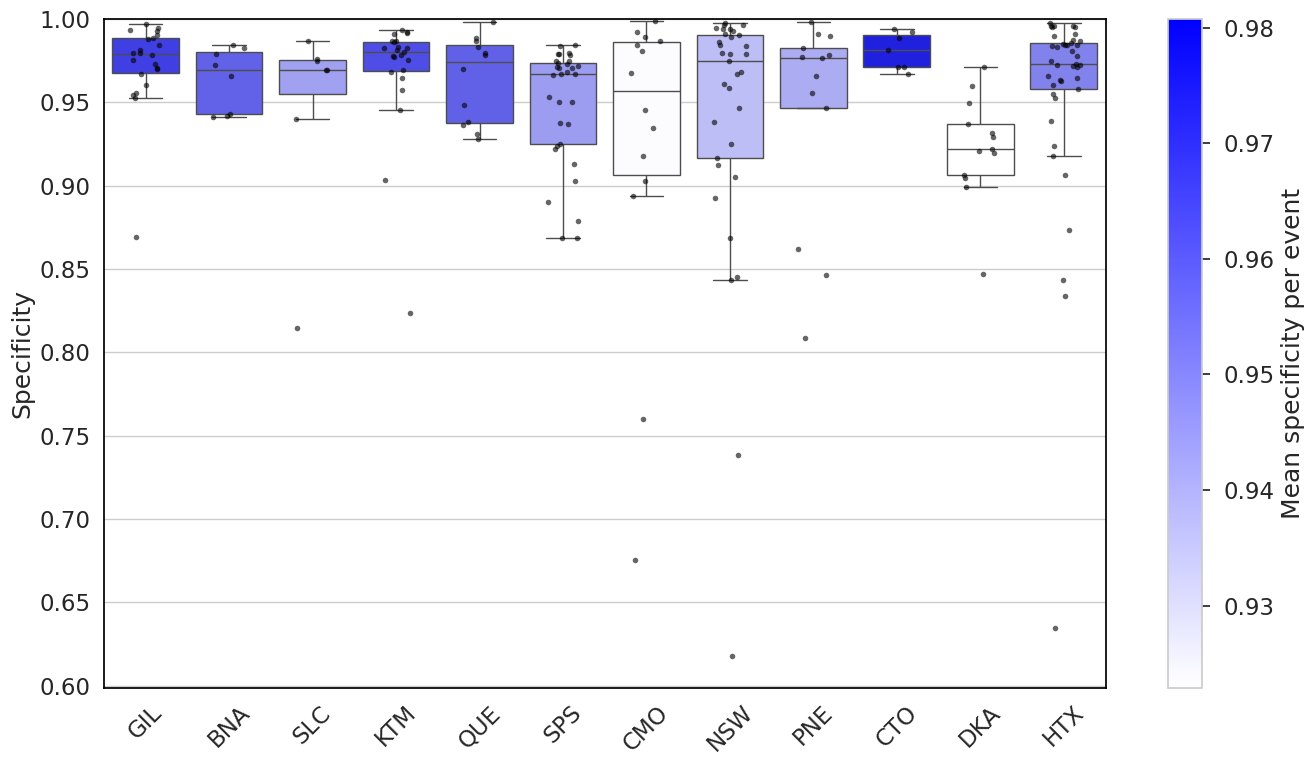

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os

def main():
    # Load the data with error handling
    data_path = r'/content/drive/MyDrive/UA_Transition/UFO/perLabelSpec.csv'
    try:
        data = pd.read_csv(data_path)
    except Exception as e:
        print(f"Error reading the CSV file from {data_path}: {e}")
        return

    try:
        # Create a 'Region' column in the DataFrame
        data['Region'] = data['Filename'].str[:3]

        # Filter the data to only include 'Region' values with more than 4 rows
        counts = data['Region'].value_counts()
        data = data[data['Region'].isin(counts[counts > 4].index)]

        # Calculate mean Specificity per 'Region' and normalize these values
        mean_specificity_per_region = data.groupby('Region')['Specificity'].mean()
        normalized_specificity = (mean_specificity_per_region - mean_specificity_per_region.min()) / (
            mean_specificity_per_region.max() - mean_specificity_per_region.min()
        )

        # Create a custom blue palette that transitions from white to pure blue (#0000ff)
        custom_blue = LinearSegmentedColormap.from_list('custom_blue', ['#ffffff', '#0000ff'])

        # Map normalized Specificity values to the custom blue color gradient
        colors = custom_blue(normalized_specificity)

        # Create a dictionary to map 'Region' to its corresponding color
        region_to_color = {region: mcolors.to_hex(color) for region, color in zip(mean_specificity_per_region.index, colors)}

        # Convert normalized_specificity to DataFrame for CSV export
        normalized_specificity_df = normalized_specificity.reset_index()
        normalized_specificity_df.columns = ['Region', 'Normalized_Specificity']

        # Map colors to each region in the new DataFrame
        normalized_specificity_df['Color'] = normalized_specificity_df['Region'].map(region_to_color)

        # Save the DataFrame to a CSV file with error handling
        output_path = '/content/drive/MyDrive/UA_Transition/UFO/normalized_iou_per_region.csv'
        normalized_specificity_df.to_csv(output_path, index=False)
        print(f"CSV file saved to {output_path}")

    except Exception as e:
        print(f"Error processing the data: {e}")
        return

    # Visualization
    try:
        # Increase global font sizes using rcParams for Matplotlib
        plt.rcParams.update({
            'font.size': 12,
            'axes.titlesize': 14,
            'axes.labelsize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10
        })

        # Set the style and context using Seaborn
        sns.set_style("whitegrid")
        sns.set_context("notebook", font_scale=1.5)

        # Create a figure and axis for the boxplot
        fig, ax = plt.subplots(figsize=(14, 8))

        # Generate the boxplot with custom colors and without showing outliers
        sns.boxplot(x='Region', y='Specificity', data=data, ax=ax, showfliers=False, palette=region_to_color)

        # Overlay individual data points on the boxplot
        sns.stripplot(x='Region', y='Specificity', data=data, ax=ax, color='black', alpha=0.6, size=4, jitter=0.2)

        # Set the y-axis limit to end at 1
        ax.set_ylim(top=1)

        # Remove the x-axis title
        ax.set_xlabel('')

        # Set the y-axis label
        ax.set_ylabel('Specificity')

        # Rotate the x-tick labels for better readability
        plt.xticks(rotation=45)

        # Create a colorbar as a legend using the custom blue palette
        sm = plt.cm.ScalarMappable(cmap=custom_blue,
                                   norm=plt.Normalize(vmin=mean_specificity_per_region.min(),
                                                      vmax=mean_specificity_per_region.max()))
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Mean specificity per event')
        cbar.ax.tick_params(pad=10)

        # Set the plot border (all axes spines) to black
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Adjust the layout and display the plot
        plt.tight_layout()
        output_filename = "/content/drive/MyDrive/UA_Transition/UFO/fig6.pdf"
        plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error during visualization: {e}")
        return

if __name__ == "__main__":
    main()


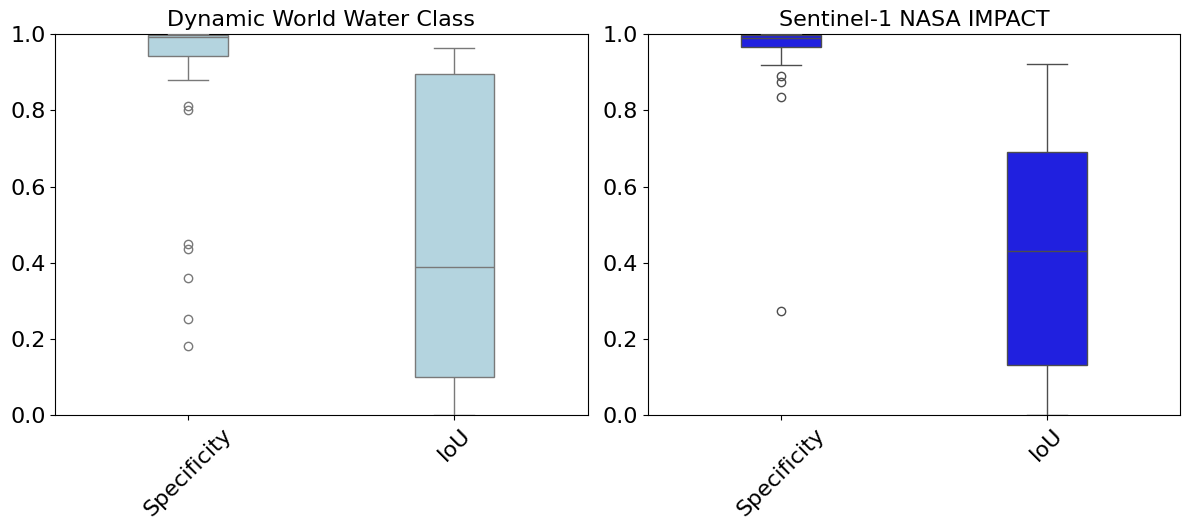

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# Define file paths
file_path1 = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsS1UFO.csv'
file_path2 = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsDWUFOv2.csv'

# Load the CSV files with error handling
try:
    data1 = pd.read_csv(file_path1)
except Exception as e:
    print(f"Error reading file {file_path1}: {e}")
    sys.exit(1)

try:
    data2 = pd.read_csv(file_path2)
except Exception as e:
    print(f"Error reading file {file_path2}: {e}")
    sys.exit(1)

# Add a column to identify the source for each dataset
data1['Source'] = 'Sentinel-1 NASA IMPACT'
data2['Source'] = 'Dynamic World Water Class'

# Concatenate the two datasets
data = pd.concat([data1, data2], ignore_index=True)

# Define the list of metrics to keep: Specificity and IoU
selected_metrics = ['Specificity', 'IoU']

# Melt the data for a suitable format for seaborn boxplot, keeping only the selected metrics
data_melted = data.melt(id_vars='Source', value_vars=selected_metrics, var_name='Metric', value_name='Value')

# Create separate datasets for DW and S1
dw_data = data_melted[data_melted['Source'] == 'Dynamic World Water Class']
s1_data = data_melted[data_melted['Source'] == 'Sentinel-1 NASA IMPACT']

# Define custom colors for each source
custom_colors = {
    "Dynamic World Water Class": "#ADD8E6",  # lighter blue
    "Sentinel-1 NASA IMPACT": "#0000ff"        # pure blue
}

# Create subplots: one for DW and one for S1
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Dynamic World Water Class (DW)
sns.boxplot(
    data=dw_data,
    x='Metric',
    y='Value',
    width=0.3,
    color=custom_colors["Dynamic World Water Class"],
    ax=axes[0]
)
axes[0].set_title("Dynamic World Water Class", fontsize=16)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45, labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)
for spine in axes[0].spines.values():
    spine.set_edgecolor('black')
for line in axes[0].lines:
    line.set_zorder(3)
for patch in axes[0].artists:
    patch.set_zorder(3)

# Plot for Sentinel-1 NASA IMPACT (S1)
sns.boxplot(
    data=s1_data,
    x='Metric',
    y='Value',
    width=0.3,
    color=custom_colors["Sentinel-1 NASA IMPACT"],
    ax=axes[1]
)
axes[1].set_title("Sentinel-1 NASA IMPACT", fontsize=16)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45, labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')
for line in axes[1].lines:
    line.set_zorder(3)
for patch in axes[1].artists:
    patch.set_zorder(3)

# Adjust layout to ensure nothing is clipped and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.9])
output_filename = "/content/drive/MyDrive/UA_Transition/UFO/fig10_dw_s1.pdf"
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


<ipython-input-7-e79ce99b4413>:60: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


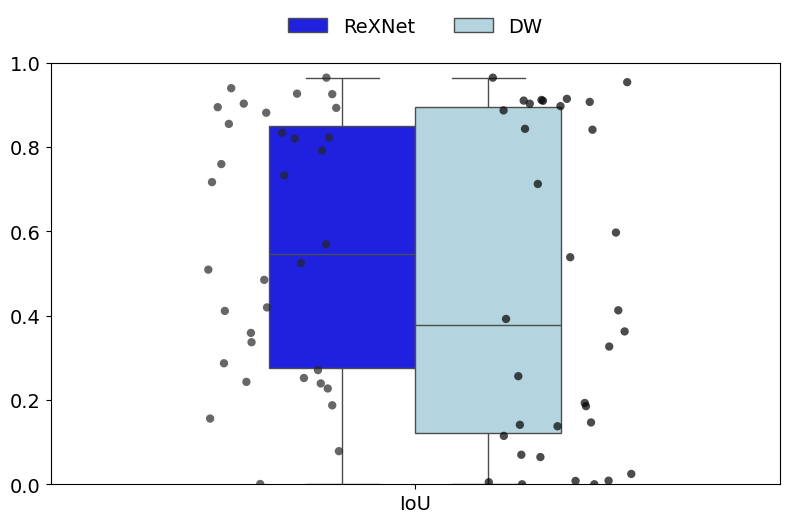

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# =============================================================================
# 1) Read CSV Data
# =============================================================================
file_path = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsDWvModel.csv'

try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error reading file {file_path}: {e}")
    sys.exit(1)

# =============================================================================
# 2) Reshape Data for Box Plot: Only IoU Data
# =============================================================================
rows = []
for idx, row in df.iterrows():
    # ReXNet (deep learning model) - IoU
    rows.append({
        'Filename': row['Filename'],
        'Metric': 'IoU',
        'Value': row['IoU_perLabel'],
        'Source': 'ReXNet'
    })
    # Dynamic World (DW) - IoU
    rows.append({
        'Filename': row['Filename'],
        'Metric': 'IoU',
        'Value': row['IoU_DW'],
        'Source': 'DW'
    })

data_melted = pd.DataFrame(rows)

# =============================================================================
# 3) Create Box Plot (colored by Source) and Overlay Jittered Black Points
# =============================================================================
# Custom palette for ReXNet vs. DW
custom_palette = {
    "ReXNet": "#0000ff",  # Pure blue
    "DW": "#ADD8E6"       # Light blue
}

plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=data_melted,
    x='Metric',
    y='Value',
    hue='Source',
    palette=custom_palette,
    width=0.4,
    showfliers=False  # Hide outlier symbols so the stripplot handles them
)

# Overlay jittered black data points
sns.stripplot(
    data=data_melted,
    x='Metric',
    y='Value',
    hue='Source',
    dodge=True,          # Separate points horizontally by Source
    color='black',       # All points in black
    alpha=0.7,           # Slight transparency
    size=6,              # Point size
    jitter=0.2,          # Horizontal jitter
    ax=ax,
    legend=False         # Avoid duplicate legend entries
)

# =============================================================================
# 4) Legend & Formatting
# =============================================================================
# Remove the existing legend and add a clean one
handles, labels = ax.get_legend_handles_labels()
# The first half of the handles/labels belong to the boxplot; the second half are from stripplot.
# We'll keep just the first 2 unique entries (ReXNet, DW).
ax.legend(
    handles[:2],
    labels[:2],
    frameon=False,
    fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(0, 1)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Give spines a clear edge color
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Bring boxplot elements to the front
for line in ax.lines:
    line.set_zorder(3)
for patch in ax.artists:
    patch.set_zorder(3)

plt.tight_layout(rect=[0, 0, 1, 0.9])

# =============================================================================
# 5) Save and Show the Plot
# =============================================================================
output_filename = r'/content/drive/MyDrive/UA_Transition/UFO/dw_rexnet_iou_plot.pdf'
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


<ipython-input-9-aec143e9e490>:64: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(


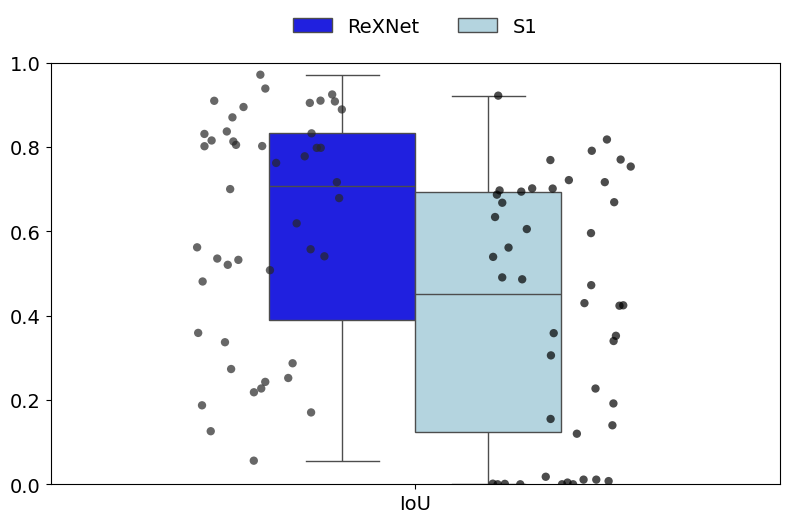

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# =============================================================================
# 1) Read CSV Data
# =============================================================================
file_path = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsS1vModel.csv'

try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error reading file {file_path}: {e}")
    sys.exit(1)

# =============================================================================
# 2) Reshape Data for Box Plot: Only IoU Data
# =============================================================================
# We assume the CSV has at least the following columns:
#   Filename, IoU_perLabel, IoU_S1
# where IoU_perLabel corresponds to the deep learning model (ReXNet)
# and IoU_S1 corresponds to Sentinel-1 (S1).
rows = []
for idx, row in df.iterrows():
    # Deep learning model (ReXNet) - IoU
    rows.append({
        'Filename': row['Filename'],
        'Metric': 'IoU',
        'Value': row['IoU_perLabel'],
        'Source': 'ReXNet'
    })
    # Sentinel-1 (S1) - IoU
    rows.append({
        'Filename': row['Filename'],
        'Metric': 'IoU',
        'Value': row['IoU_S1UFO'],
        'Source': 'S1'
    })

data_melted = pd.DataFrame(rows)

# =============================================================================
# 3) Create Box Plot with Jittered Black Data Points
# =============================================================================
# Define a custom palette for the two sources
custom_palette = {
    "ReXNet": "#0000ff",  # Pure blue for the deep learning model
    "S1": "#ADD8E6"       # Light blue for Sentinel-1
}

plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=data_melted,
    x='Metric',
    y='Value',
    hue='Source',
    palette=custom_palette,
    width=0.4,
    showfliers=False  # Hide default outlier markers
)

# Overlay jittered data points (all in black) directly on top of the box plot
sns.stripplot(
    data=data_melted,
    x='Metric',
    y='Value',
    hue='Source',
    dodge=True,          # Separate points horizontally based on Source
    color='black',       # All points rendered in black
    alpha=0.7,           # Slight transparency for better visualization
    size=6,              # Adjust point size as needed
    jitter=0.2,          # Apply jitter for horizontal separation
    ax=ax,
    legend=False         # Disable legend duplication from the stripplot
)

# Remove duplicate legend entries and format the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[:2],
    labels[:2],
    frameon=False,
    fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2
)

# =============================================================================
# 4) Plot Formatting
# =============================================================================
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(0, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Style the plot spines for clear boundaries
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Bring boxplot elements to the front for better visual clarity
for line in ax.lines:
    line.set_zorder(3)
for patch in ax.artists:
    patch.set_zorder(3)

plt.tight_layout(rect=[0, 0, 1, 0.9])

# =============================================================================
# 5) Save and Show the Plot
# =============================================================================
output_filename = r'/content/drive/MyDrive/UA_Transition/UFO/s1_rexnet_iou_plot.pdf'
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


<ipython-input-32-7776ad8da8e0>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-32-7776ad8da8e0>:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


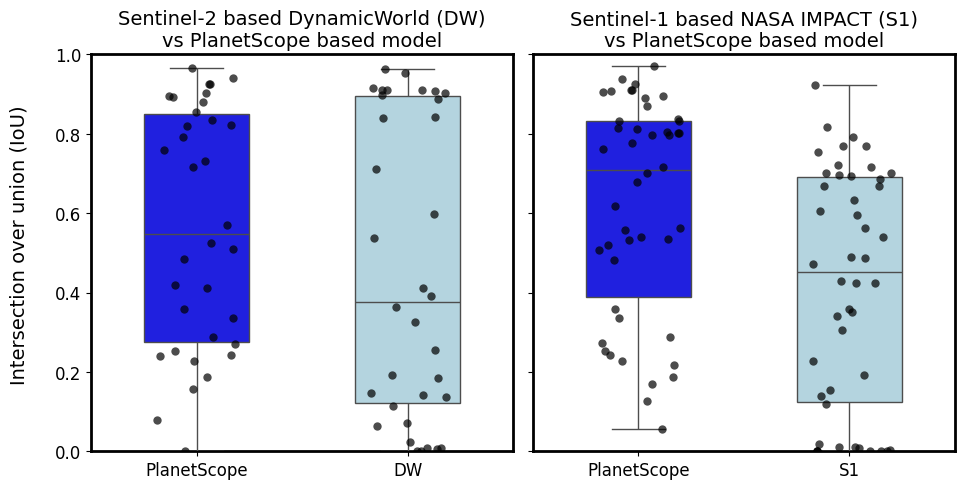

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# =============================================================================
# 1) File Paths
# =============================================================================
dw_file_path = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsDWvModel.csv'
s1_file_path = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsS1vModel.csv'

# =============================================================================
# 2) Read CSV Data with Error Handling
# =============================================================================
try:
    dw_df = pd.read_csv(dw_file_path)
except Exception as e:
    print(f"Error reading file {dw_file_path}: {e}")
    sys.exit(1)

try:
    s1_df = pd.read_csv(s1_file_path)
except Exception as e:
    print(f"Error reading file {s1_file_path}: {e}")
    sys.exit(1)

# =============================================================================
# 3) Prepare Long-Format Data: Only IoU
#    - We'll rename "IoU_perLabel" -> PlanetScope
#    - We'll rename "IoU_DW" -> DW
#    - We'll rename "IoU_S1UFO" -> S1
# =============================================================================

# ---------- PlanetScope vs. DW ----------
rows_dw = []
for _, row in dw_df.iterrows():
    # PlanetScope
    rows_dw.append({
        'Filename': row['Filename'],
        'Source': 'PlanetScope',
        'Value': row['IoU_perLabel']
    })
    # DW
    rows_dw.append({
        'Filename': row['Filename'],
        'Source': 'DW',
        'Value': row['IoU_DW']
    })
dw_data = pd.DataFrame(rows_dw)

# ---------- PlanetScope vs. S1 ----------
rows_s1 = []
for _, row in s1_df.iterrows():
    # PlanetScope
    rows_s1.append({
        'Filename': row['Filename'],
        'Source': 'PlanetScope',
        'Value': row['IoU_perLabel']
    })
    # S1
    rows_s1.append({
        'Filename': row['Filename'],
        'Source': 'S1',
        'Value': row['IoU_S1UFO']
    })
s1_data = pd.DataFrame(rows_s1)

# =============================================================================
# 4) Create Two Subplots: Left = (PlanetScope vs. DW), Right = (PlanetScope vs. S1)
#    We share the Y-axis so IoU is labeled only once.
# =============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Custom color palette
palette_left = ["#0000ff", "#ADD8E6"]   # PlanetScope (blue), DW (light blue)
palette_right = ["#0000ff", "#ADD8E6"]    # PlanetScope (blue), S1 (light blue)

# -----------------------------------------------------------------------------
# Left Subplot: PlanetScope vs. DW
# -----------------------------------------------------------------------------
sns.boxplot(
    data=dw_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'DW'],  # Ensure consistent order
    palette=palette_left,
    width=0.5,
    showfliers=False,
    ax=axes[0]
)

# Overlay jittered black points
sns.stripplot(
    data=dw_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'DW'],
    color='black',
    alpha=0.7,
    size=6,
    jitter=0.2,
    ax=axes[0]
)

axes[0].set_title("Sentinel-2 based DynamicWorld (DW)\nvs PlanetScope based model", fontsize=14)
axes[0].set_xlabel("")  # No x-axis label
axes[0].set_ylabel("")  # We'll add a shared y-axis label below
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='both', labelsize=12)
# Ensure y-ticks appear on the left side
axes[0].yaxis.tick_left()

# -----------------------------------------------------------------------------
# Right Subplot: PlanetScope vs. S1
# -----------------------------------------------------------------------------
sns.boxplot(
    data=s1_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'S1'],
    palette=palette_right,
    width=0.5,
    showfliers=False,
    ax=axes[1]
)

# Overlay jittered black points
sns.stripplot(
    data=s1_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'S1'],
    color='black',
    alpha=0.7,
    size=6,
    jitter=0.2,
    ax=axes[1]
)

axes[1].set_title("Sentinel-1 based NASA IMPACT (S1)\nvs PlanetScope based model", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='both', labelsize=12)
# Hide y-tick labels on the right subplot (ticks remain for proper scaling)
axes[1].tick_params(labelleft=False)

# =============================================================================
# 5) Final Figure Styling
# =============================================================================
# Use a single label for the shared y-axis:
fig.text(0.04, 0.5, "Intersection over union (IoU)", va='center', rotation='vertical', fontsize=14)

# Enhance borders thickness and ensure box elements are in front
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)  # Thicken the borders
    for line in ax.lines:
        line.set_zorder(3)
    for patch in ax.artists:
        patch.set_zorder(3)

plt.tight_layout(rect=[0.07, 0, 1, 1])  # Leave space on the left for the y-axis label

# =============================================================================
# 6) Save and Show
# =============================================================================
output_filename = r'/content/drive/MyDrive/UA_Transition/UFO/planetscope_dw_s1_iou_plot.pdf'
plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
plt.show()


Mean IoU values for PlanetScope vs. DW:
Source
DW             0.456898
PlanetScope    0.564988
Name: Value, dtype: float64

Mean IoU values for PlanetScope vs. S1:
Source
PlanetScope    0.619057
S1             0.412646
Name: Value, dtype: float64


<ipython-input-5-9afe1b11812f>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-5-9afe1b11812f>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


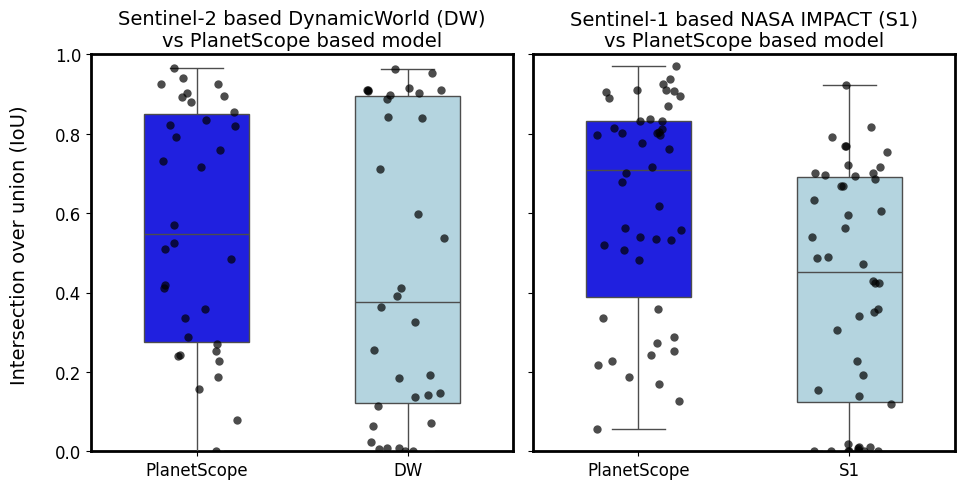

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# =============================================================================
# 1) File Paths
# =============================================================================
dw_file_path = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsDWvModel.csv'
s1_file_path = r'/content/drive/MyDrive/UA_Transition/UFO/predictionsS1vModel.csv'

# =============================================================================
# 2) Read CSV Data with Error Handling
# =============================================================================
try:
    dw_df = pd.read_csv(dw_file_path)
except Exception as e:
    print(f"Error reading file {dw_file_path}: {e}")
    sys.exit(1)

try:
    s1_df = pd.read_csv(s1_file_path)
except Exception as e:
    print(f"Error reading file {s1_file_path}: {e}")
    sys.exit(1)

# =============================================================================
# 3) Prepare Long-Format Data: Only IoU
#    - Rename "IoU_perLabel" -> PlanetScope
#    - Rename "IoU_DW" -> DW
#    - Rename "IoU_S1UFO" -> S1
# =============================================================================

# ---------- PlanetScope vs. DW ----------
rows_dw = []
for _, row in dw_df.iterrows():
    # PlanetScope
    rows_dw.append({
        'Filename': row['Filename'],
        'Source': 'PlanetScope',
        'Value': row['IoU_perLabel']
    })
    # DW
    rows_dw.append({
        'Filename': row['Filename'],
        'Source': 'DW',
        'Value': row['IoU_DW']
    })
dw_data = pd.DataFrame(rows_dw)

# ---------- PlanetScope vs. S1 ----------
rows_s1 = []
for _, row in s1_df.iterrows():
    # PlanetScope
    rows_s1.append({
        'Filename': row['Filename'],
        'Source': 'PlanetScope',
        'Value': row['IoU_perLabel']
    })
    # S1
    rows_s1.append({
        'Filename': row['Filename'],
        'Source': 'S1',
        'Value': row['IoU_S1UFO']
    })
s1_data = pd.DataFrame(rows_s1)

# =============================================================================
# 4) Compute and Print Mean of Each Distribution
# =============================================================================
print("Mean IoU values for PlanetScope vs. DW:")
try:
    dw_means = dw_data.groupby('Source')['Value'].mean()
    print(dw_means)
except Exception as e:
    print(f"Error computing means for DW data: {e}")

print("\nMean IoU values for PlanetScope vs. S1:")
try:
    s1_means = s1_data.groupby('Source')['Value'].mean()
    print(s1_means)
except Exception as e:
    print(f"Error computing means for S1 data: {e}")

# =============================================================================
# 5) Create Two Subplots: Left = (PlanetScope vs. DW), Right = (PlanetScope vs. S1)
#    We share the Y-axis so IoU is labeled only once.
# =============================================================================
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)

# Custom color palette
palette_left = ["#0000ff", "#ADD8E6"]   # PlanetScope (blue), DW (light blue)
palette_right = ["#0000ff", "#ADD8E6"]    # PlanetScope (blue), S1 (light blue)

# -----------------------------------------------------------------------------
# Left Subplot: PlanetScope vs. DW
# -----------------------------------------------------------------------------
sns.boxplot(
    data=dw_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'DW'],  # Ensure consistent order
    palette=palette_left,
    width=0.5,
    showfliers=False,
    ax=axes[0]
)

# Overlay jittered black points
sns.stripplot(
    data=dw_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'DW'],
    color='black',
    alpha=0.7,
    size=6,
    jitter=0.2,
    ax=axes[0]
)

axes[0].set_title("Sentinel-2 based DynamicWorld (DW)\nvs PlanetScope based model", fontsize=14)
axes[0].set_xlabel("")  # No x-axis label
axes[0].set_ylabel("")  # We'll add a shared y-axis label below
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='both', labelsize=12)
# Ensure y-ticks appear on the left side
axes[0].yaxis.tick_left()

# -----------------------------------------------------------------------------
# Right Subplot: PlanetScope vs. S1
# -----------------------------------------------------------------------------
sns.boxplot(
    data=s1_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'S1'],
    palette=palette_right,
    width=0.5,
    showfliers=False,
    ax=axes[1]
)

# Overlay jittered black points
sns.stripplot(
    data=s1_data,
    x='Source',
    y='Value',
    order=['PlanetScope', 'S1'],
    color='black',
    alpha=0.7,
    size=6,
    jitter=0.2,
    ax=axes[1]
)

axes[1].set_title("Sentinel-1 based NASA IMPACT (S1)\nvs PlanetScope based model", fontsize=14)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='both', labelsize=12)
# Hide y-tick labels on the right subplot (ticks remain for proper scaling)
axes[1].tick_params(labelleft=False)

# =============================================================================
# 6) Final Figure Styling
# =============================================================================
# Use a single label for the shared y-axis:
fig.text(0.04, 0.5, "Intersection over union (IoU)", va='center', rotation='vertical', fontsize=14)

# Enhance borders thickness and ensure box elements are in front
for ax in axes:
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)  # Thicken the borders
    for line in ax.lines:
        line.set_zorder(3)
    for patch in ax.artists:
        patch.set_zorder(3)

plt.tight_layout(rect=[0.07, 0, 1, 1])  # Leave space on the left for the y-axis label

# =============================================================================
# 7) Save and Show
# =============================================================================
output_filename = r'/content/drive/MyDrive/UA_Transition/UFO/planetscope_dw_s1_iou_plot.pdf'
try:
    plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
except Exception as e:
    print(f"Error saving the plot: {e}")
plt.show()


CSV file saved to /content/drive/MyDrive/UA_Transition/UFO/normalized_iou_per_region.csv


<ipython-input-37-3e4a6597bef1>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='IoU', data=data, ax=ax, showfliers=False, palette=region_to_color)


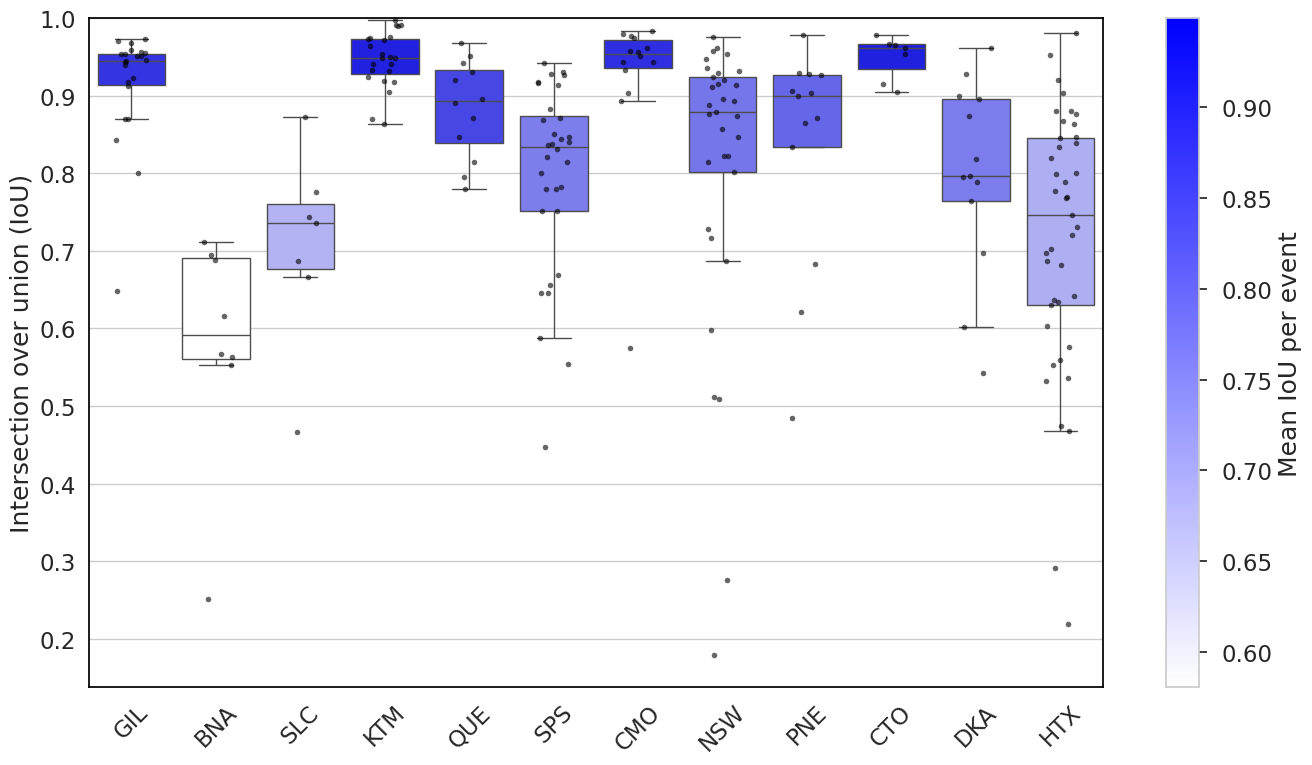

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os

def main():
    # Load the data with error handling
    data_path = r'/content/drive/MyDrive/UA_Transition/UFO/perLabelIOUrexnest150.csv'
    try:
        data = pd.read_csv(data_path)
    except Exception as e:
        print(f"Error reading the CSV file from {data_path}: {e}")
        return

    try:
        # Create a 'Region' column in the DataFrame
        data['Region'] = data['Filename'].str[:3]

        # Filter the data to only include 'Region' values with more than 4 rows
        counts = data['Region'].value_counts()
        data = data[data['Region'].isin(counts[counts > 4].index)]

        # Calculate mean IoU per 'Region' and normalize these values
        mean_iou_per_region = data.groupby('Region')['IoU'].mean()
        normalized_iou = (mean_iou_per_region - mean_iou_per_region.min()) / (mean_iou_per_region.max() - mean_iou_per_region.min())

        # Create a custom blue palette that transitions from white to pure blue (#0000ff)
        custom_blue = LinearSegmentedColormap.from_list('custom_blue', ['#ffffff', '#0000ff'])

        # Map normalized IoU values to the custom blue color gradient
        colors = custom_blue(normalized_iou)

        # Create a dictionary to map 'Region' to its corresponding color
        region_to_color = {region: mcolors.to_hex(color) for region, color in zip(mean_iou_per_region.index, colors)}

        # Convert normalized_iou to DataFrame for CSV export
        normalized_iou_df = normalized_iou.reset_index()
        normalized_iou_df.columns = ['Region', 'Normalized_IoU']

        # Map colors to each region in the new DataFrame
        normalized_iou_df['Color'] = normalized_iou_df['Region'].map(region_to_color)

        # Save the DataFrame to a CSV file with error handling
        output_path = '/content/drive/MyDrive/UA_Transition/UFO/normalized_iou_per_region.csv'
        normalized_iou_df.to_csv(output_path, index=False)
        print(f"CSV file saved to {output_path}")

    except Exception as e:
        print(f"Error processing the data: {e}")
        return

    # Visualization
    try:
        # Increase global font sizes using rcParams for Matplotlib
        plt.rcParams.update({
            'font.size': 12,
            'axes.titlesize': 14,
            'axes.labelsize': 12,
            'xtick.labelsize': 10,
            'ytick.labelsize': 10
        })

        # Set the style and context using Seaborn
        sns.set_style("whitegrid")
        sns.set_context("notebook", font_scale=1.5)

        # Create a figure and axis for the boxplot
        fig, ax = plt.subplots(figsize=(14, 8))

        # Generate the boxplot with custom colors and without showing outliers
        sns.boxplot(x='Region', y='IoU', data=data, ax=ax, showfliers=False, palette=region_to_color)

        # Overlay individual data points on the boxplot
        sns.stripplot(x='Region', y='IoU', data=data, ax=ax, color='black', alpha=0.6, size=4, jitter=0.2)

        # Set the y-axis limit to end at 1
        ax.set_ylim(top=1)

        # Remove the x-axis title
        ax.set_xlabel('')

        # Set the y-axis label to IoU
        ax.set_ylabel('Intersection over union (IoU)')

        # Rotate the x-tick labels for better readability
        plt.xticks(rotation=45)

        # Create a colorbar as a legend using the custom blue palette
        sm = plt.cm.ScalarMappable(cmap=custom_blue,
                                   norm=plt.Normalize(vmin=mean_iou_per_region.min(), vmax=mean_iou_per_region.max()))
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Mean IoU per event')
        # Label padding for the colorbar
        cbar.ax.tick_params(pad=10)

        # Set the plot border (all axes spines) to black
        for spine in ax.spines.values():
            spine.set_edgecolor('black')

        # Adjust the layout and display the plot
        plt.tight_layout()
        output_filename = "/content/drive/MyDrive/UA_Transition/UFO/fig7.pdf"
        plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error during visualization: {e}")
        return

if __name__ == "__main__":
    main()


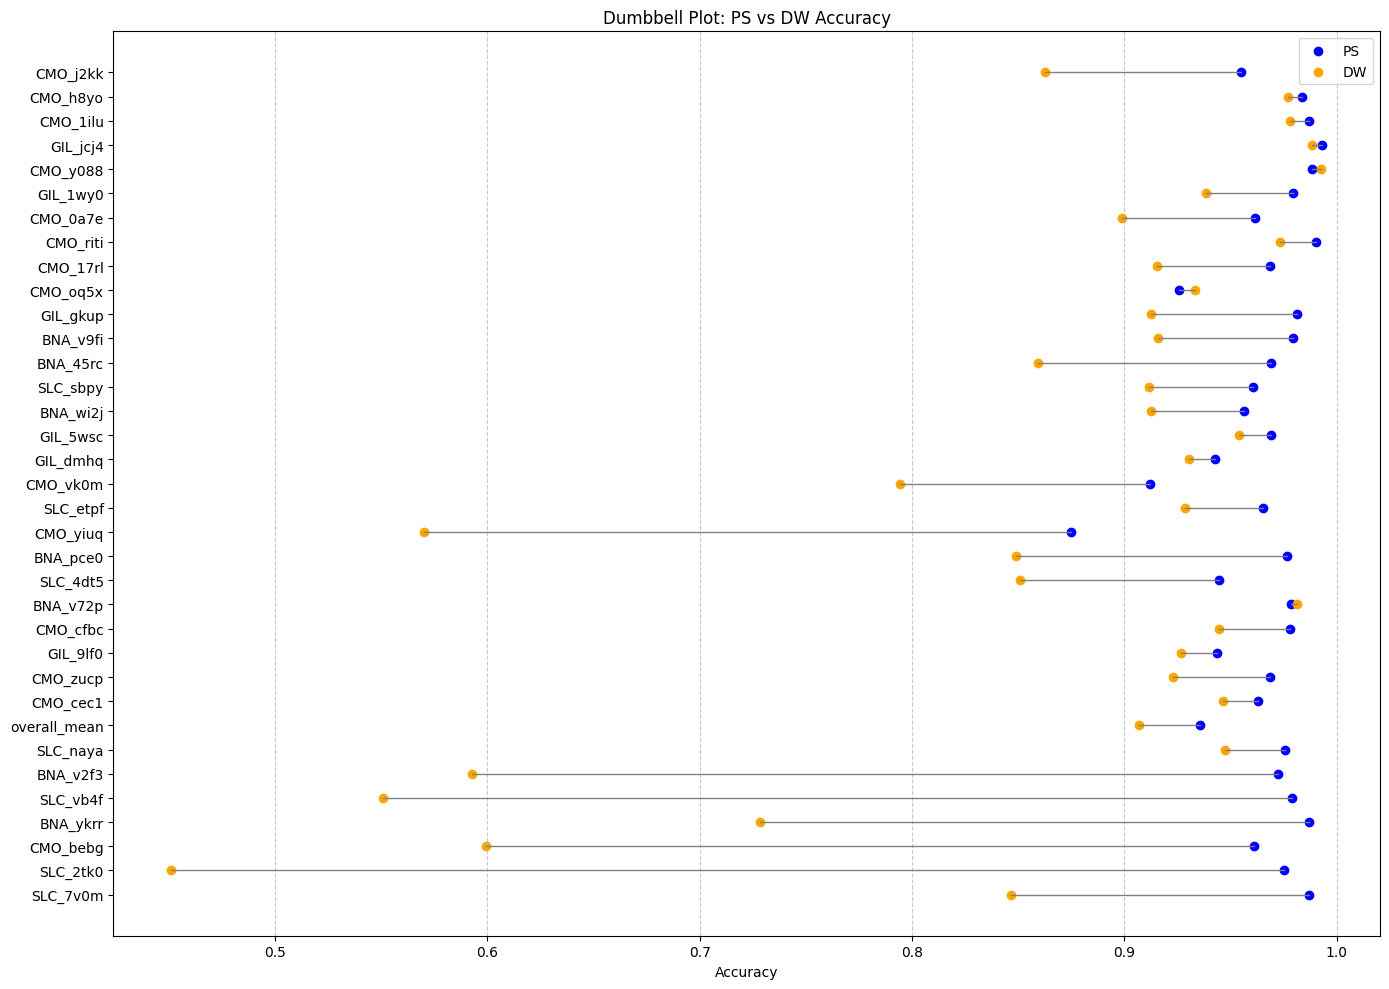

In [ ]:
import matplotlib.lines as mlines

df_sorted = df.sort_values('Accuracy_df1')

fig, ax = plt.subplots(figsize=(14, 10))

for idx, row in df_sorted.iterrows():
    ax.plot([row['Accuracy_df1'], row['Accuracy_df2']], [idx, idx], color='gray', linewidth=1)
    ax.scatter(row['Accuracy_df1'], idx, color='blue', label='PS' if idx == 0 else "")
    ax.scatter(row['Accuracy_df2'], idx, color='orange', label='DW' if idx == 0 else "")

ax.set_yticks(range(len(df_sorted)))
ax.set_yticklabels(df_sorted['file'])
ax.set_xlabel('Accuracy')
ax.set_title('Dumbbell Plot: PS vs DW Accuracy')
ax.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Mean PS - DW Accuracy Difference:
0.1021954656057143

Mean PS - S1 Accuracy Difference:
0.08520596002978723

Plot saved to: /content/drive/MyDrive/UA_Transition/UFO/planetscope_dw_s1_iou_plot.pdf


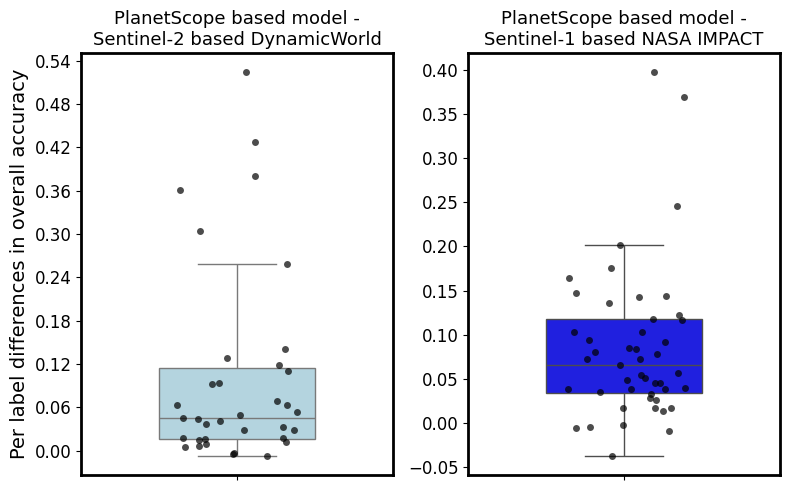

In [ ]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# =============================================================================
# 1) Data for DW: PS Accuracy (Accuracy_df1) vs. DW Accuracy (Accuracy_df2)
# =============================================================================
dw_data = {
    'file': [
        'GIL_jcj4', 'GIL_5wsc', 'GIL_9lf0', 'GIL_1wy0', 'GIL_gkup', 'GIL_dmhq',
        'BNA_wi2j', 'BNA_ykrr', 'BNA_v72p', 'BNA_pce0', 'BNA_v2f3', 'BNA_45rc', 'BNA_v9fi',
        'SLC_naya', 'SLC_sbpy', 'SLC_7v0m', 'SLC_4dt5', 'SLC_2tk0', 'SLC_vb4f', 'SLC_etpf',
        'CMO_cec1', 'CMO_zucp', 'CMO_vk0m', 'CMO_oq5x', 'CMO_riti', 'CMO_bebg', 'CMO_yiuq',
        'CMO_h8yo', 'CMO_cfbc', 'CMO_17rl', 'CMO_1ilu', 'CMO_j2kk', 'CMO_y088', 'CMO_0a7e',
        'overall_mean'
    ],
    'Accuracy_df1': [
        0.987068176, 0.975189209, 0.960911751, 0.98681736, 0.978787422, 0.972491264,
        0.975729942, 0.935661316, 0.962927818, 0.968545914, 0.943624496, 0.977845192, 0.978366852,
        0.944551468, 0.976551056, 0.874641418, 0.965208054, 0.912213326, 0.942611694, 0.968946457,
        0.956422806, 0.96044445, 0.969133377, 0.979251862, 0.981162071, 0.925876617, 0.968594551,
        0.990261078, 0.961447716, 0.979333878, 0.98813343, 0.993252754, 0.986851692, 0.983823776,
        0.954987918
    ],
    'Accuracy_df2': [
        0.8463811874, 0.4510622025, 0.5994844437, 0.7285928726, 0.5509443283, 0.5926237106,
        0.9473838806, 0.9069328308, 0.9464254379, 0.9229106903, 0.9266624451, 0.9446516037, 0.9813756943,
        0.8509349823, 0.848783493, 0.570306778, 0.928355217, 0.7941255569, 0.9304466248, 0.9538908005,
        0.91269207, 0.9116201401, 0.85912323, 0.9158058167, 0.9124965668, 0.9331531525, 0.9151973724,
        0.973195076, 0.8986663818, 0.9381942749, 0.9924240112, 0.9881086349, 0.9781618118, 0.9771184921,
        0.8625950533
    ]
}

try:
    dw_df = pd.DataFrame(dw_data)
except Exception as e:
    print(f"Error creating DW DataFrame: {e}")
    sys.exit(1)

# Compute the difference: PS accuracy - DW accuracy
dw_df['accuracy_diff'] = dw_df['Accuracy_df1'] - dw_df['Accuracy_df2']

# =============================================================================
# 2) Data for S1: PS Accuracy (Accuracy_rexnet) vs. S1 Accuracy (Accuracy_s1)
# =============================================================================
s1_data = {
    'file': [
        "GIL_nl0k", "BNA_wi2j", "BNA_ykrr", "BNA_v72p", "BNA_pce0", "BNA_t0m1", "BNA_v2f3", "BNA_45rc", "BNA_v9fi",
        "SPS_do2l", "SPS_xii7", "SPS_jzq9", "SPS_vbtb", "SPS_5gu2", "SPS_f3gt", "SPS_9dxo", "SPS_0ll8", "SPS_hnmq",
        "SPS_bllz", "SPS_qiwy", "SPS_yu2f", "SPS_ogkc", "SPS_4ay5", "SPS_h4ec", "SPS_tqo6", "SPS_5yy8", "SPS_hrhi",
        "SPS_pdtx", "SPS_hsqq", "SPS_jzq9", "SPS_flcx", "SPS_it5q", "SPS_jbt7", "SPS_7ev7", "SPS_mgjg", "SPS_mqpx",
        "SPS_nepf", "SPS_q0cg", "SPS_rjsa", "SPS_6oqt", "SPS_vr7d", "BEI_a69z", "BEI_1ynv", "PNE_dz8s", "PNE_eayq",
        "PNE_l2wm", "overall_mean"
    ],
    'Accuracy_rexnet': [
        0.972121239, 0.975729942, 0.935661316, 0.962927818, 0.968545914, 0.941637039, 0.943624496, 0.977845192, 0.978366852,
        0.961324692, 0.948426247, 0.965701103, 0.918902397, 0.957274437, 0.984235764, 0.934011459, 0.936556816, 0.961017609,
        0.976918221, 0.931287766, 0.954033852, 0.919981003, 0.903827667, 0.951487541, 0.941865921, 0.92455864, 0.923379898,
        0.951809883, 0.911294937, 0.963032722, 0.9547472, 0.903995514, 0.971207619, 0.972111702, 0.950922012, 0.940941811,
        0.940717697, 0.957048416, 0.922400475, 0.958238602, 0.9030056, 0.925531387, 0.961559296, 0.910112381, 0.966386795,
        0.979962349, 0.954987918
    ],
    'Accuracy_s1': [
        0.9331951141, 0.9355449677, 0.9073867798, 0.9457674026, 0.9233493805, 0.9786186218, 0.9268885936, 0.9394226074, 0.9798434827,
        0.9155531433, 0.8631858826, 0.9706792365, 0.8840795468, 0.8909823722, 0.9927043915, 0.8852586746, 0.8337798893, 0.8771982193,
        0.8987550735, 0.7295523866, 0.83751297, 0.6747531891, 0.886625107, 0.8042125963, 0.7988892796, 0.7599983215, 0.8503913879,
        0.8711434381, 0.7752902932, 0.9487782458, 0.7796599804, 0.785574913, 0.9449310303, 0.9206829071, 0.847779274, 0.867770195,
        0.9017962252, 0.834866339, 0.8679156219, 0.9246559143, 0.7592515442, 0.8308324814, 0.9653196335, 0.5406608582, 0.5694447626,
        0.923409462, 0.8626932986
    ]
}

try:
    s1_df = pd.DataFrame(s1_data)
except Exception as e:
    print(f"Error creating S1 DataFrame: {e}")
    sys.exit(1)

# Compute the difference: PS accuracy - S1 accuracy
s1_df['accuracy_diff'] = s1_df['Accuracy_rexnet'] - s1_df['Accuracy_s1']

# =============================================================================
# 3) Compute and Print Mean Differences
# =============================================================================
print("Mean PS - DW Accuracy Difference:")
try:
    print(dw_df['accuracy_diff'].mean())
except Exception as e:
    print(f"Error computing DW mean difference: {e}")

print("\nMean PS - S1 Accuracy Difference:")
try:
    print(s1_df['accuracy_diff'].mean())
except Exception as e:
    print(f"Error computing S1 mean difference: {e}")

# =============================================================================
# 4) Plotting: Create Two Box Plots with Specified Colors and Increased y-ticks
# =============================================================================

# Define palettes as provided:
palette_left = ["#0000ff", "#ADD8E6"]   # PlanetScope (blue), DW (light blue)
palette_right = ["#0000ff", "#ADD8E6"]  # PlanetScope (blue), S1 (light blue)

# Create subplots for the two difference distributions
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))

# --------------------------
# Left Subplot: PS - DW differences
# --------------------------
sns.boxplot(
    data=dw_df,
    y='accuracy_diff',
    color='#ADD8E6',  # fill with light blue
    width=0.5,
    showfliers=False,
    ax=axes[0]
)
sns.stripplot(
    data=dw_df,
    y='accuracy_diff',
    color='black',
    alpha=0.7,
    size=5,
    jitter=0.2,
    ax=axes[0]
)
axes[0].set_title("PlanetScope based model -\nSentinel-2 based DynamicWorld", fontsize=13)
axes[0].set_xlabel("")
axes[0].set_ylabel("Per label differences in overall accuracy", fontsize=14)
# Set the box edge color to blue
for patch in axes[0].artists:
    patch.set_edgecolor(palette_left[0])
    patch.set_linewidth(2)
for spine in axes[0].spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
# Increase the number of y-ticks
axes[0].yaxis.set_major_locator(ticker.MaxNLocator(10))

# --------------------------
# Right Subplot: PS - S1 differences
# --------------------------
sns.boxplot(
    data=s1_df,
    y='accuracy_diff',
    color='#0000ff',  # fill with blue
    width=0.5,
    showfliers=False,
    ax=axes[1]
)
sns.stripplot(
    data=s1_df,
    y='accuracy_diff',
    color='black',
    alpha=0.7,
    size=5,
    jitter=0.2,
    ax=axes[1]
)
axes[1].set_title("PlanetScope based model -\nSentinel-1 based NASA IMPACT", fontsize=13)
axes[1].set_xlabel("")
axes[1].set_ylabel("")
# Set the box edge color to blue
for patch in axes[1].artists:
    patch.set_edgecolor(palette_right[0])
    patch.set_linewidth(2)
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
# Increase the number of y-ticks
axes[1].yaxis.set_major_locator(ticker.MaxNLocator(10))

#increase y-axis font
axes[0].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)




plt.tight_layout()

# =============================================================================
# 5) Save and Show the Plot
# =============================================================================
output_filename = "/content/drive/MyDrive/UA_Transition/UFO/planetscope_dw_s1_iou_plot.pdf"
try:
    plt.savefig(output_filename, format='pdf', dpi=400, bbox_inches='tight')
    print(f"\nPlot saved to: {output_filename}")
except Exception as e:
    print(f"Error saving the plot: {e}")

plt.show()
